In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Clos

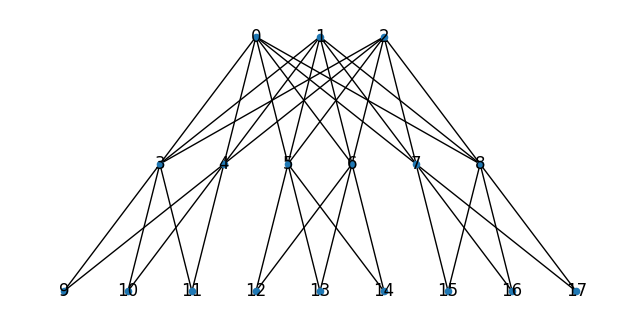

In [3]:
# network topology generating functions

n = 6 # starts from 4
######
num_core = n // 2
num_agg = n
num_edge = n**2 // 4
num_ToR = 2 # number of qpus per rack
num_nodes = num_edge * num_ToR # number of q nodes
# num_bsms = num_leaves # number of BSMs

num_vertices = num_core + num_agg + num_edge + num_nodes

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')

for core in core_switches:
    for agg in agg_switches:
        G.add_edge(core,agg)

new_edges = []
extra_edges = []
agg_conn = np.ones(num_agg)* (n//2)
for i, edge in enumerate(edge_switches):
    i1 = np.argwhere(agg_conn>0)[0,0]
    G.add_edge(edge,agg_switches[i1])
    agg_conn[i1] -= 1 
    G.add_edge(edge,agg_switches[i1+1])
    agg_conn[i1+1] -= 1 

if n == 4:
    pos_core = {i: (i-n//4 ,2) for i in core_switches}
    pos_agg = {i: ((i-n),1) for i in agg_switches}
    pos_edge = {i: ((i-(n**2//2)),0) for i in edge_switches}
elif n== 6:
    pos_core = {i: (i-n ,2) for i in core_switches}
    pos_agg = {i: ((i-1.75*n),1) for i in agg_switches}
    pos_edge = {i: ((i-(n**2//2)),0) for i in edge_switches}
elif n== 8:
    pos_core = {i: (i-1.75*n ,2) for i in core_switches}
    pos_agg = {i: ((i-2.5*n),1) for i in agg_switches}
    pos_edge = {i: ((i-(n**2//2)),0) for i in edge_switches}

pos = pos_core | pos_agg | pos_edge 


fig, ax = plt.subplots(figsize=(8,4))
nx.draw(G, pos, node_size=20,  with_labels=True)
plt.show()

Alternative configuration

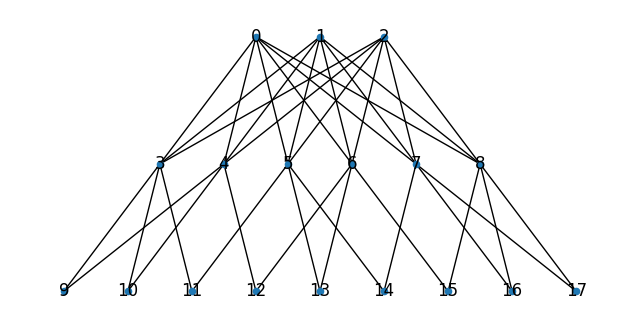

In [3]:
# network topology generating functions

n = 6 # starts from 4
num_ToR = 2 # number of qpus per rack
######
num_core = n // 2
num_agg = n
num_edge = n**2 // 4
# num_ToR = 3
num_nodes = num_edge * num_ToR # number of q nodes
# num_bsms = num_leaves # number of BSMs

if n==4:
    conn_right = [7]
    conn_left = [8]
elif n==6:
    conn_right = [11,14]
    conn_left = [12,15]
elif n==8:
    conn_right = [15,19,23]
    conn_left = [16,20,24]

num_vertices = num_core + num_agg + num_edge + num_nodes

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')

for core in core_switches:
    for agg in agg_switches:
        G.add_edge(core,agg)

new_edges = []
extra_edges = []
agg_conn = np.ones(num_agg)* (n//2)
for i, edge in enumerate(edge_switches):
    i1 = np.argwhere(agg_conn>0)[0,0]
    G.add_edge(edge,agg_switches[i1])
    agg_conn[i1] -= 1 
    if edge in conn_left:
        extra_edges.append((edge,agg_switches[i1]))
        new_edges.append((edge,agg_switches[i1-1]))
    G.add_edge(edge,agg_switches[i1+1])
    agg_conn[i1+1] -= 1 
    if edge in conn_right:
        extra_edges.append((edge,agg_switches[i1+1]))
        new_edges.append((edge,agg_switches[i1+2]))

G.remove_edges_from(extra_edges)
G.add_edges_from(new_edges)

if n == 4:
    pos_core = {i: (i-n//4 ,2) for i in core_switches}
    pos_agg = {i: ((i-n),1) for i in agg_switches}
    pos_edge = {i: ((i-(n**2//2)),0) for i in edge_switches}
elif n== 6:
    pos_core = {i: (i-n ,2) for i in core_switches}
    pos_agg = {i: ((i-1.75*n),1) for i in agg_switches}
    pos_edge = {i: ((i-(n**2//2)),0) for i in edge_switches}
elif n== 8:
    pos_core = {i: (i-1.75*n ,2) for i in core_switches}
    pos_agg = {i: ((i-2.5*n),1) for i in agg_switches}
    pos_edge = {i: ((i-(n**2//2)),0) for i in edge_switches}

pos = pos_core | pos_agg | pos_edge 


fig, ax = plt.subplots(figsize=(8,4))
nx.draw(G, pos, node_size=20,  with_labels=True)
plt.show()